### Regression Problem

Regression is analogous to classification, in that it is a supervised learning problem. Instead of classes, regressors predict real values (i.e. numbers)

In [2]:
#Diabetes example
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = datasets.load_diabetes()
type(data)

sklearn.utils.Bunch

In [9]:
data['data'][1]

array([-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
       -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405])

In [8]:
data['target'][:100]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83.])

##### Data exploration

In [11]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [12]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1B49BAD68>,
      dtype=object)

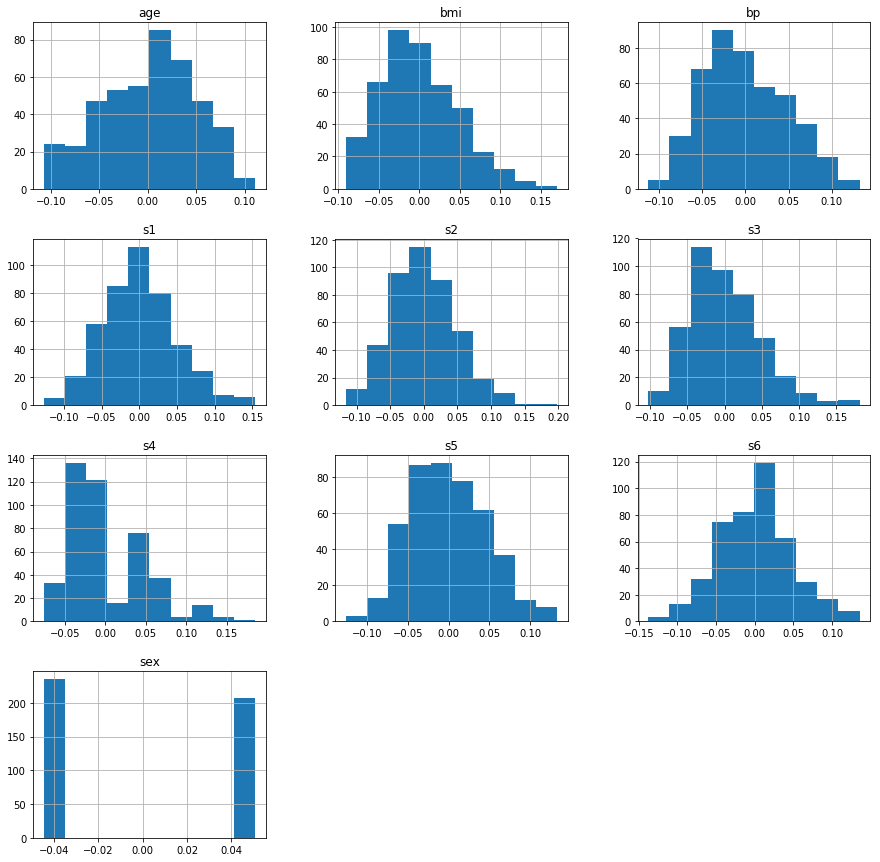

In [14]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
df.hist(ax=ax)

In [15]:
df['sex'].value_counts()

-0.044642    235
 0.050680    207
Name: sex, dtype: int64

In [16]:
new_df = df.copy()

In [18]:
new_df['target'] = data.target
new_df['target'][:10]

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
5     97.0
6    138.0
7     63.0
8    110.0
9    310.0
Name: target, dtype: float64

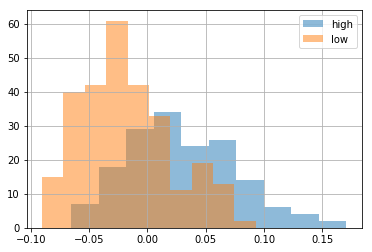

In [20]:
new_df[new_df['target']>175]['bmi'].hist(alpha=0.5, label="high")
new_df[new_df['target']<= 175]['bmi'].hist(alpha=0.5, label="low")
plt.legend()

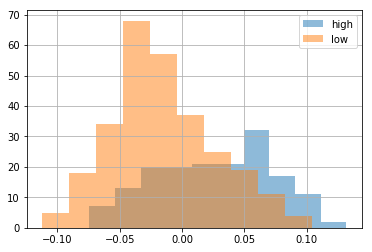

In [21]:
new_df[new_df['target']>175]['bp'].hist(alpha=0.5, label="high")
new_df[new_df['target']<= 175]['bp'].hist(alpha=0.5, label="low")
plt.legend()

##### Data cleaning

##### Feature Engineering/Feature selection

In [23]:
new_df.corr()['target'].sort_values()

s3       -0.394789
sex       0.043062
s2        0.174054
age       0.187889
s1        0.212022
s6        0.382483
s4        0.430453
bp        0.441484
s5        0.565883
bmi       0.586450
target    1.000000
Name: target, dtype: float64

##### Model Selection

In [42]:
# Great! Let's use linear regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score, train_test_split
import itertools
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(new_df[['bmi', 's5', 'bp', 's4', 's6']], new_df['target'], test_size = 0.2, random_state = 42)

loss = ['squared_loss', 'huber', 'squared_epsilon_insensitive']
penalty = ['l2', 'elasticnet']
learning_rate = ['constant', 'optimal', 'invscaling']

hyperparams = itertools.product(loss, penalty, learning_rate)
list(hyperparams)

parameters = {'loss':('squared_loss', 'huber', 'squared_epsilon_insensitive'), 'penalty':('l2', 'elasticnet'), 'learning_rate': ('constant', 'optimal', 'invscaling')}

In [43]:
sgd = SGDRegressor()
clf = GridSearchCV(sgd, parameters)
clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ('squared_loss', 'huber', 'squared_epsilon_insensitive'), 'penalty': ('l2', 'elasticnet'), 'learning_rate': ('constant', 'optimal', 'invscaling')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
clf.cv_results_['mean_test_score']

array([ 2.98112646e-02,  5.38716168e-02, -3.87201986e+00, -3.87202017e+00,
        9.12733991e-02,  8.78956220e-02, -7.64224421e+20, -1.40458448e+21,
       -1.55251800e-02, -1.37426319e-02, -1.25247864e+21, -1.05271775e+21,
       -2.40919970e-02, -2.19994365e-02, -3.91822987e+00, -3.91822968e+00,
        1.03823008e-02,  9.23285249e-03])

In [45]:
clf.best_score_ 

0.09127339909201236

In [46]:
clf.best_params_

{'learning_rate': 'constant',
 'loss': 'squared_epsilon_insensitive',
 'penalty': 'l2'}

In [ ]:
# cv_score={}
# for a in hyperparams:
#     reg = SGDRgressor(loss = a.loss, penalty = a.penalty, learning_rate = a.learning_rate)
#     cv_score[str{a}]  = np.mean(cross_val_score(reg, x_train, y_train))
# print(max(cv_score.values()))

##### Model training 

hzv_a5ooUXuayubL5Qxi